In [1]:
from scipy.io import loadmat
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pth_mat = r'\\10.99.68.178\andreex\data\monkey fetus\gestational 40\mat files\vol_all_combined_8_24_2023_volHE.mat'

In [3]:
try:
    data = loadmat(pth_mat)

except:
    data = h5py.File(pth_mat, 'r')

In [4]:
list(data.keys())

['#refs#', 'C', 'C0', 'imlist', 'sx', 'sz', 'volHE']

In [5]:
C = np.array(data['C']).transpose()
print(C[:5])

[[0.37445039 0.28995841 0.38835413]
 [0.40043573 0.23645606 0.4258533 ]
 [0.43073415 0.29347925 0.46876425]
 [0.440181   0.34895928 0.4574359 ]
 [0.50622837 0.30138408 0.49723183]]


In [6]:
C0 = np.array(data['C0']).transpose()
print(C0[:5])

[[ 95.48484848  73.93939394  99.03030303]
 [102.11111111  60.2962963  108.59259259]
 [109.8372093   74.8372093  119.53488372]
 [112.24615385  88.98461538 116.64615385]
 [129.08823529  76.85294118 126.79411765]]


In [7]:
print(data['volHE'].shape)

(1154, 4444, 3161)


In [ ]:
im100 = data['volHE'][100,:,:]

In [13]:
im100 = np.array(data['volHE'][100:110,1000:2000,1000:2000], dtype=np.uint8)

In [14]:
im100.shape

(10, 1000, 1000)

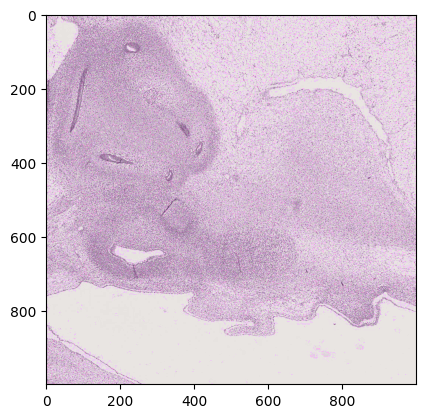

In [18]:
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(C)

plt.imshow(im100[0,:,:], cmap = custom_cmap)
plt.show()

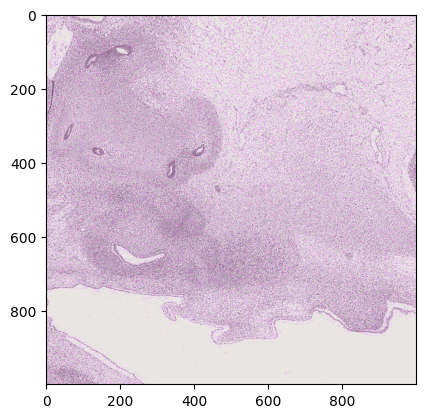

In [17]:
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(C)

plt.imshow(im100[9,:,:], cmap = custom_cmap)
plt.show()

In [21]:
cp = np.array(loadmat(r'GI_centerpath_1.mat')['CPsmoothP'])*4  # we did calculations in downsampled version, so reupsample

In [22]:
cp[:5]

array([[1568.32761954, 3642.25696061,  704.69279862],
       [1565.29115054, 3641.36335882,  703.52721499],
       [1562.18483297, 3640.48060682,  702.44531982],
       [1559.01101872, 3639.60687066,  701.44365093],
       [1555.77204307, 3638.74034714,  700.51879555]])

In [23]:
# Coordinates of the starting and ending points of the vector
start_point = cp[0]
end_point = cp[1]

# Calculate the vector from the start_point to the end_point
vector = end_point - start_point

# Normalize the vector to ensure consistent scaling
normalized_vector = vector / np.linalg.norm(vector)

print(normalized_vector)

[-0.90022307 -0.26492645 -0.345561  ]


In [24]:
cp[0]

array([1568.32761954, 3642.25696061,  704.69279862])

In [25]:
data['volHE'].shape

(1154, 4444, 3161)

In [31]:
print(z_range, x_range, y_range)

range(694, 714) range(1558, 1578) range(3632, 3652)


In [92]:
from IPython.display import clear_output
i = 0

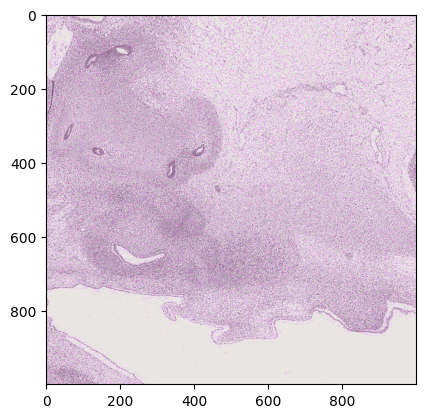

In [129]:
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(C) #[::-1])

plt.imshow(im100[9,:,:], cmap = custom_cmap)
plt.show()

In [105]:
# Create a 2D slice along the vector direction
while i < len(cp):
    z_start = int(cp[i][2])
    z_tol = 10
    z_0 = z_start - z_tol
    z_1 = z_start + z_tol
    
    x_start = int(cp[i][1])
    x_tol = 100
    x_0 = x_start - x_tol
    x_1 = x_start + x_tol
    
    y_start = int(cp[i][0])
    y_tol = 100
    y_0 = y_start - y_tol
    y_1 = y_start + y_tol
    
    
    vol = data['volHE'][z_0:z_1, x_0:x_1, y_0:y_1]
    
    plt.imshow(vol[z_tol, 0:y_tol*2, 0:x_tol*2], cmap = custom_cmap)
    i += 1
    
    plt.show()
    
    clear_output(wait=True)

KeyboardInterrupt: 

In [180]:
from scipy.ndimage import rotate

outpth = r'C:\Users\Donald\Desktop\GI_images_stack_centerpath\HE_colormap'


# Create a 2D slice along the vector direction
for i, point in enumerate(cp):
    # i = i + 600
    next_point = cp[i+1]
    orientation_vector = point - next_point
    orientation_vector /= np.linalg.norm(orientation_vector)
    #print(orientation_vector)
    
    z_start = int(point[2])
    z_tol = 100
    z_0 = z_start - z_tol
    z_1 = z_start + z_tol
    
    x_start = int(point[1])
    x_tol = 100
    x_0 = x_start - x_tol
    x_1 = x_start + x_tol
    
    y_start = int(point[0])
    y_tol = 100
    y_0 = y_start - y_tol
    y_1 = y_start + y_tol
    
    
    vol = data['volHE'][z_0:z_1, x_0:x_1, y_0:y_1]
    
    # Calculate angles
    x, y, z = orientation_vector
    angle_xy = np.arctan2(y, x)
    angle_yz = np.arctan2(z, y)
    angle_xz = np.arctan2(z, x)
    
    # Convert angles to degrees if needed
    angle_xy_deg = np.degrees(angle_xy)
    angle_yz_deg = np.degrees(angle_yz)
    angle_xz_deg = np.degrees(angle_xz)
    
    # Print results
    #print("Angle XY:", angle_xy_deg, "degrees")
    #print("Angle YZ:", angle_yz_deg, "degrees")
    #print("Angle XZ:", angle_xz_deg, "degrees")
    
    
    rotated_vol = rotate(vol, angle_yz_deg, axes=(0, 2), reshape=True)
    rotated_vol = rotate(rotated_vol, angle_yz_deg, axes=(1, 2), reshape=True)
    rotated_vol = rotate(rotated_vol, angle_xy_deg, axes=(0, 1), reshape=True)

    
    
    #print(i)
    #print(rotated_vol.shape)
    
    im = rotated_vol[z_tol, :, :]
    
    plt.imshow(im, cmap = custom_cmap)
    i += 1
    
    plt.show()
    #break
    
    plt.imsave(f'{outpth}\GI_{i}.png', im, cmap=custom_cmap)
    
    clear_output(wait=True)

KeyboardInterrupt: 

In [140]:
rotation_matrix

array([[-0.80959002, -0.53254385,  0.24690293],
       [-0.53254385,  0.84327779,  0.07266101],
       [-0.24690293, -0.07266101, -0.96631223]])

In [132]:
rotation_angle

75.96207243705723